## Getting Started with pandas
* Pandas is a python version of Excel.
* panel data
* It contains data structures and data manipulation tools designed to make data cleaning and analysis fast and easy in Python
* Can be used in tandem with numerical computing tools (NumPy and SciPy), analytical libraries (statsmodels, scikit-learn) and data visualisation libraries (matplotlib).
* It adopts NumPy's idiomatic style of array-based computing, so pandas is fast. Biggest difference between the two is that Pandas is designed to work with heterogenous data, whereas NumPy is designed for homogenous numerical data.

## pandas Data Structures
* There are 2 workhorse Data Structures in pandas - Series and DataFrame.
* Not a universal solution to every problem, but provide a solid, easy-to-use basis.
* In python world, we use short name np for numpy and pd for pandas, so you always put the two lines at the top

In [1]:
import numpy as np
import pandas as pd

### Series

* 
```python
series = pd.Series(data, index)
```
* It's a 1-D array like object containing sequence of values and associated array of labels.
* The output representation for a Series shows index on the left and values on the right.
* You can access the index and values of a Series seperately through 'index' and 'values' attributes respectively.

In [2]:
countries = ['USA', 'France', 'China']
my_data = [100, 200, 300]
pd.Series(my_data, countries)

USA       100
France    200
China     300
dtype: int64

* If we do not specify an index, a default one from 0 to (n-1) is created.

In [3]:
pd.Series(my_data)

0    100
1    200
2    300
dtype: int64

In [6]:
# obj2=pd.Series(my_data, index=['d','b','a','c'])
obj2=pd.Series(my_data, index=['d','b','a'])
obj2

d    100
b    200
a    300
dtype: int64

In [7]:
obj2.index

Index(['d', 'b', 'a'], dtype='object')

In [6]:
obj2.values #the values is a np.ndarray

array([100, 200, 300], dtype=int64)

In [7]:
# You can also use numpy array to create Series
array = np.array(my_data) 
pd.Series(array)

0    100
1    200
2    300
dtype: int32

In [8]:
# Use dict to create Series. The keys in dict will be the index of the Series.
my_dict = {'a': 50, 'b': 60, 'c' : 70, 'd' : 80} 
pd.Series(my_dict)

a    50
b    60
c    70
d    80
dtype: int64

In [9]:
#Unlike Numpy array, Series can store different types. -- dtype will be object
my_dict = {'a': 'hello', 'b': 60, 'c' : 70, 'd' : 80} 
pd.Series(my_dict)

a    hello
b       60
c       70
d       80
dtype: object

* You can use labels in index to select single values or set of values. To select set of values you need to use list of indices.
* We can use NumPy like operations (filtering with boolean indexing, multiplication or math functions). The index-value link will not be affected by this.

In [10]:
countries = ['USA', 'France', 'China']
population = [329, 65, 1420]
worldpopulation = pd.Series(population, countries)
print(worldpopulation)
worldpopulation['USA'] #series is more like dictionary than ndarray

USA        329
France      65
China     1420
dtype: int64


329

In [11]:
print(worldpopulation)
worldpopulation['USA'] = 400
# worldpopulation[['USA', 'France', 'China', 'Canada']]
worldpopulation[['China','USA', 'France']] #change the order

USA        329
France      65
China     1420
dtype: int64


China     1420
USA        400
France      65
dtype: int64

In [12]:
worldpopulation['Canada'] = 37 #like adding new key/value pair to dictionary
print(worldpopulation)

USA        400
France      65
China     1420
Canada      37
dtype: int64


In [13]:
worldpopulation > 100 # similar to vectorization in ndarray

USA        True
France    False
China      True
Canada    False
dtype: bool

In [14]:
worldpopulation[worldpopulation > 100]

USA       400
China    1420
dtype: int64

In [15]:
worldpopulation * 2 # similar to vectorization in ndarray

USA        800
France     130
China     2840
Canada      74
dtype: int64

In [16]:
countries = ['USA', 'France', 'China']
genderRatio = [0.97, 0.96, 1.06]  # male/female
worldgenderRatio = pd.Series(genderRatio, countries)
worldgenderRatio

USA       0.97
France    0.96
China     1.06
dtype: float64

* in math operations, Series computes the values by index and results are in float. If there is no matched index pair, the value will be NaN (not a number)

In [17]:
worldmen=worldgenderRatio/(worldgenderRatio+1) * worldpopulation
worldmen

Canada           NaN
China     730.679612
France     31.836735
USA       196.954315
dtype: float64

In [18]:
series1 = pd.Series([1, 2, 3, 4], ['London', 'HongKong', 'Shanghai', 'Shenzhen'])
series2 = pd.Series([5, 6, 7, 8], ['London', 'Shenzhen', 'NewYork', 'Delhi'])

In [19]:
series1 - series2

Delhi       NaN
HongKong    NaN
London     -4.0
NewYork     NaN
Shanghai    NaN
Shenzhen   -2.0
dtype: float64

In [20]:
series1 + series2

Delhi        NaN
HongKong     NaN
London       6.0
NewYork      NaN
Shanghai     NaN
Shenzhen    10.0
dtype: float64

In [21]:
series1 * series2

Delhi        NaN
HongKong     NaN
London       5.0
NewYork      NaN
Shanghai     NaN
Shenzhen    24.0
dtype: float64

In [22]:
series1 / series2

Delhi            NaN
HongKong         NaN
London      0.200000
NewYork          NaN
Shanghai         NaN
Shenzhen    0.666667
dtype: float64

* Series is like a fixed-length, ordered Dictionary because mapping of index to values resembles that of a dict.
* If you have a dict, you can create a Series from it. If you are only passing the dict, then its keys become the index in order.

In [23]:
'USA' in worldpopulation

True

In [24]:
'Canada' in worldpopulation

True

In [25]:
'USA' in worldgenderRatio

True

In [26]:
'Canada' in worldgenderRatio

False

In [27]:
worldgenderRatio

USA       0.97
France    0.96
China     1.06
dtype: float64

* You can override this by passing dict keys in the order you want them to appear.
* In case the key list is not present in the dict, its respective value will be NaN (Python Version of missing or NA value). Missing values in Series can be found with the 'notnull' or 'isnull' operator.

In [28]:
countries = ['France', 'China','USA',  'Mexico']
newworldgenderRatio = pd.Series(worldgenderRatio, index=countries)
newworldgenderRatio

France    0.96
China     1.06
USA       0.97
Mexico     NaN
dtype: float64

In [29]:
pd.isnull(newworldgenderRatio)

France    False
China     False
USA       False
Mexico     True
dtype: bool

In [30]:
pd.notnull(newworldgenderRatio)

France     True
China      True
USA        True
Mexico    False
dtype: bool

In [31]:
newworldgenderRatio.isnull()

France    False
China     False
USA       False
Mexico     True
dtype: bool

* Series automatically aligns by the index label in arithematic operations, so the order doesn't matter.
* This alignment of indexes can be seen as similar to Joins in Databases.

In [32]:
worldpopulation

USA        400
France      65
China     1420
Canada      37
dtype: int64

In [33]:
newworldgenderRatio

France    0.96
China     1.06
USA       0.97
Mexico     NaN
dtype: float64

In [34]:
worldmen=newworldgenderRatio/(newworldgenderRatio+1) * worldpopulation #order doesn't matter. the index matches.
worldmen

Canada           NaN
China     730.679612
France     31.836735
Mexico           NaN
USA       196.954315
dtype: float64

* Both Series object and its Index have a name attribute and they integrate with other pandas functinality.

In [35]:
worldpopulation.name = 'population'
worldpopulation.index.name = 'country'

worldpopulation

country
USA        400
France      65
China     1420
Canada      37
Name: population, dtype: int64

* A Series index can be replaced in-place by assignment.

In [36]:
worldpopulation.index

Index(['USA', 'France', 'China', 'Canada'], dtype='object', name='country')

In [37]:
worldpopulation.index = ['US','FR','CN','CA']
worldpopulation.index.name = 'country'
worldpopulation

country
US     400
FR      65
CN    1420
CA      37
Name: population, dtype: int64

### DataFrame
* Represents rectangular table  of data containing ordered collection of columns, each of different value type (numeric, string, boolean, etc.).
* It has a row and column index and can be though of as a dict of Series, all sharing same index.
* Under the hood, data in DataFrame is stored as one or more 2-D blocks.
* NOTE - Even though DataFrame is 2-D, it can be used to represent higher dimensional data in tabular form using hierarchical indexing.
* It will have an index assigned automatically and columns placed in sorted order.

* Many ways to create a DataFrame, the most common is from a dict of <b> equal-length </b> lists or NumPy arrays or Series.

In [8]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
       'year' : [2000, 2001, 2002, 2001, 2002, 2003],
       'pop' : [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [9]:
# The head() method will show you the first 5 rows of the DataFrame by default.
frame.head()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [10]:
frame.tail()

,state,year,pop
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [41]:
np.random.seed(100)
pd.DataFrame(data=np.random.randint(low=1, high=10, size=(5, 4)))
# Every column is a Series, and they share the same index, so a Dataframe is a collection of Series with same index

,0,1,2,3
0,9,9,4,8
1,8,1,5,3
2,6,3,3,3
3,2,1,9,5
4,1,7,3,5


In [42]:
# use Series to create Dataframe. The length can be different. Dataframe aligns series by index.
df = {'name': pd.Series(['Jon', 'Aaron', 'Tod'], index=['a', 'b', 'c']),
     'age': pd.Series(['39', '28', '17', '25'], index=['a', 'b', 'c', 'd']),
     'nationality': pd.Series(['US', 'China', 'US'], ['a', 'b', 'c'])}
pd.DataFrame(df)

,name,age,nationality
a,Jon,39,US
b,Aaron,28,China
c,Tod,17,US
d,NaN,25,NaN


In [43]:
data = {'name': ['Jon', 'Aaron', 'Tod'],
#      'age': ['39', '28', '17', '25'], # different length will break because there is no index to match
     'age': ['39', '28', '17'],
     'nationality': ['US', 'China', 'US']}
my_df = pd.DataFrame(data, index=['Lagos', 'Dubai', 'Mumbai'])
my_df

,name,age,nationality
Lagos,Jon,39,US
Dubai,Aaron,28,China
Mumbai,Tod,17,US


In [44]:
data

{'name': ['Jon', 'Aaron', 'Tod'],
 'age': ['39', '28', '17'],
 'nationality': ['US', 'China', 'US']}

In [11]:
pd.DataFrame(data)

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [46]:
# To arrange sequence of columns, specify the sequence.
pd.DataFrame(data, columns=['nationality', 'name','age'])

,nationality,name,age
0,US,Jon,39
1,China,Aaron,28
2,US,Tod,17


In [13]:
# If you pass a column that isn't present in the dict, it will appear with missing values (NaN).
df=pd.DataFrame(data, columns=['nationality', 'name','age', 'weight'])
df

,nationality,name,age,weight


* A column can be retrieved as a Series using a dict-like notation or by attribute.
* The returned Series will have the same index as the DataFrame.

In [14]:
df.columns

Index(['nationality', 'name', 'age', 'weight'], dtype='object')

In [15]:
df['name'] #if we only retrieve one column, then it returns a Series

Series([], Name: name, dtype: object)

In [50]:
type(df['name'])

pandas.core.series.Series

In [17]:
df['name', 'age'] # if we retrieve multiple columns, then it returns a DataFrame
# df['name', 'age'] # this won't work

KeyError: ('name', 'age')

In [52]:
type(df[['name', 'age']])

pandas.core.frame.DataFrame

* Attribute-like access and tab completion of column names is provided as convineance in IPython. The attribute use of column name only works if the column name is valid Python variable name (for example, if column name contains space, it won't work here).

In [53]:
df.name 

0      Jon
1    Aaron
2      Tod
Name: name, dtype: object

* Rows can be retrieved by position or name using the 'loc' method.

In [54]:
df

,nationality,name,age,weight
0,US,Jon,39,NaN
1,China,Aaron,28,NaN
2,US,Tod,17,NaN


In [55]:
df.loc[2] #now the row name is number 2, not string '2'

nationality     US
name           Tod
age             17
weight         NaN
Name: 2, dtype: object

In [56]:
df.index=['232-45-2847', '876-89-8354', '123-45-7363']
df

,nationality,name,age,weight
232-45-2847,US,Jon,39,NaN
876-89-8354,China,Aaron,28,NaN
123-45-7363,US,Tod,17,NaN


In [57]:
df.loc['876-89-8354']

nationality    China
name           Aaron
age               28
weight           NaN
Name: 876-89-8354, dtype: object

In [58]:
type(df.loc['876-89-8354'])

pandas.core.series.Series

#### Columns can be modified by assignment. We can pass a scalar values or a list of values to be assigned.
* When assigning, the length of the value list must match the length of the DataFrame.
* If we use a Series to assign to a column, its index will realign to the index of the DataFrame. Missing values will be inserted with NaNs.
* assigning a non-existant column will create a new column. New columns cannot be created with the 'attribute' method.

In [59]:
df['weight'] = 165 #broadcast to the entire column
df

,nationality,name,age,weight
232-45-2847,US,Jon,39,165
876-89-8354,China,Aaron,28,165
123-45-7363,US,Tod,17,165


In [60]:
df['weight'] = np.arange(3.0)
df

,nationality,name,age,weight
232-45-2847,US,Jon,39,0.0
876-89-8354,China,Aaron,28,1.0
123-45-7363,US,Tod,17,2.0


In [61]:
val = pd.Series([-1.2, -1.5, -1.7], index = ['876-89-8354','888-88-8888','999-99-9999'])
df['weight'] = val #it will match the index
df

,nationality,name,age,weight
232-45-2847,US,Jon,39,NaN
876-89-8354,China,Aaron,28,-1.2
123-45-7363,US,Tod,17,NaN


In [62]:
df['western'] = df.nationality == 'US' #create new column based on other columns
df

,nationality,name,age,weight,western
232-45-2847,US,Jon,39,NaN,True
876-89-8354,China,Aaron,28,-1.2,False
123-45-7363,US,Tod,17,NaN,True


* The 'del' keyword will delete columns as with a dict.
* NOTE - Any column returned from any index operation is a <b>view</b> for the DataFrame, and not a copy. <b>any change made to it will be reflected in the DataFrame</b>.

In [63]:
df['eastern'] = df.nationality != 'US'
df

,nationality,name,age,weight,western,eastern
232-45-2847,US,Jon,39,NaN,True,False
876-89-8354,China,Aaron,28,-1.2,False,True
123-45-7363,US,Tod,17,NaN,True,False


In [64]:
del df['eastern']
df

,nationality,name,age,weight,western
232-45-2847,US,Jon,39,NaN,True
876-89-8354,China,Aaron,28,-1.2,False
123-45-7363,US,Tod,17,NaN,True


In [65]:
df.columns

Index(['nationality', 'name', 'age', 'weight', 'western'], dtype='object')

#### Another method of input is nested dict of dicts.
* If it is passed as input to a DataFrame, pandas will interpret outer dict keys as columns and inner keys as row indexes.
* The keys of inner dict are sorted to form the index. But this can be changed if the index values are explicitly specified.

In [20]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},  # no data for 2000
      'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

frame3 = pd.DataFrame(pop)
frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


##### wesm commented on 10 Oct 2018
##### This bug has been fixed in pandas development and will be in the next released version (either 0.23.5 or 0.24.0). Sorry about the inconvenience. You can convert the index argument to an ndarray for now index=np.array(...)
##### this is fixed in 0.24.2

In [21]:
# pd.DataFrame(data=pop, index=[2000, 2001, 2002])  #this doesn't work as shown in textbook. Bug in earlier version.
pd.DataFrame(data=pop, index=pd.Series([2000, 2001, 2002]))

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [22]:
pd.DataFrame(data=pop, index=pd.Series([2001, 2002, 2003])) #match the index with the data

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


#### The same rules apply to a dict of Series.

In [23]:
print(frame3)
pdata = {'Ohio': frame3['Ohio'][:-1],
        'Nevada': frame3['Nevada'][:2]}
pd.DataFrame(pdata)

      Nevada  Ohio
2000     NaN   1.5
2001     2.4   1.7
2002     2.9   3.6


,Ohio,Nevada
2000,1.5,NaN
2001,1.7,2.4


#### Transpose a dataframe (swap rows with columns) by T.
* If index and columns in a DataFrame have their name attributes set, they will also be displayed.
* The values attribute returns the data in a DataFrame as a 2-D ndarray.
* If the dtypes of the columns are different, then the output ndarray's dtype will be chosen in such a way as to accomodate all the columns.

In [70]:
frame3.T

,2000,2001,2002
Nevada,NaN,2.4,2.9
Ohio,1.5,1.7,3.6


In [26]:
frame3.index.name = 'year'
frame3.columns.name = 'state'

frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [72]:
frame3.values #it is a 2d array, i.e., a matrix

array([[nan, 1.5],
       [2.4, 1.7],
       [2.9, 3.6]])

In [73]:
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [74]:
frame.values # now the dtype is object

array([['Ohio', 2000, 1.5],
       ['Ohio', 2001, 1.7],
       ['Ohio', 2002, 3.6],
       ['Nevada', 2001, 2.4],
       ['Nevada', 2002, 2.9],
       ['Nevada', 2003, 3.2]], dtype=object)

### Index Objects
* They are responsible for holding axis labels and other metadata.
* Any array or sequence of labels used in a Series or DataFrame is internally converted to an Index.
* Indexes are immutable (can't be modififed by any user). Hence it is safer to share among data structures.
* They behave like a fixed-size set. But unlike a set, <b>they can contain duplicate labels</b>.
* selection of duplicate labels will select all occurences of that label.

In [75]:
obj = pd.Series(range(3), index=['a','b','c'])
print(obj)
index = obj.index
index

a    0
b    1
c    2
dtype: int64


Index(['a', 'b', 'c'], dtype='object')

In [76]:
# index[1] = 'd' #TypeError: Index does not support mutable operations

In [77]:
# you can make a index seperately
labels = pd.Index(list("XYZ"))
labels

Index(['X', 'Y', 'Z'], dtype='object')

In [78]:
obj2 = pd.Series([1.5, -2.5, 0], index = labels)
obj2

X    1.5
Y   -2.5
Z    0.0
dtype: float64

In [79]:
#index doesn't have to be string
labels = pd.Index(np.arange(3.0))
labels

Float64Index([0.0, 1.0, 2.0], dtype='float64')

In [80]:
obj2 = pd.Series([1.5, -2.5, 0], index = labels)
obj2

0.0    1.5
1.0   -2.5
2.0    0.0
dtype: float64

In [81]:
print(obj2.index)
print(labels)
obj2.index is labels #immutable

Float64Index([0.0, 1.0, 2.0], dtype='float64')
Float64Index([0.0, 1.0, 2.0], dtype='float64')


True

In [82]:
frame3.columns

Index(['Nevada', 'Ohio'], dtype='object', name='state')

In [83]:
'Ohio' in frame3.columns

True

In [84]:
2003 in frame3.columns

False

In [85]:
#index may have duplicates
dup_labels = pd.Index(['foo', 'foo', 'x', 'y'])
dup_labels

Index(['foo', 'foo', 'x', 'y'], dtype='object')

In [86]:
dup=pd.Series(range(4), index=dup_labels)
dup

foo    0
foo    1
x      2
y      3
dtype: int64

In [87]:
dup['foo']

foo    0
foo    1
dtype: int64

In [88]:
type(dup['foo'])

pandas.core.series.Series

In [89]:
dup['foo'].index

Index(['foo', 'foo'], dtype='object')

In [90]:
dup['x']

2

In [91]:
type(dup['x'])

numpy.int64

### Dropping Entries from an Axis
* Dropping entries from an axis is easy if you already have index array or list without those entries.
* The 'drop' method will return a new object with the indicate dvalues deleted from the axis.
* In DataFrames, index values can be deleted from either axis using the drop function.
* By default drop will delete values from row axis. To delet from columns, you need to specify 'axis=1' or "axis='columns'".

In [92]:
obj = pd.Series(np.arange(5.), index=['a','b','c','d','e'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [93]:
new_obj = obj.drop('c')
new_obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

In [94]:
obj #original dataframe doesn't change

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [95]:
obj.drop(['d','c'])

a    0.0
b    1.0
e    4.0
dtype: float64

In [96]:
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [97]:
# add index and column names to matrix
data = pd.DataFrame(np.arange(16).reshape((4,4)),
                   index = ['Ohio','Colorado','Utah','New York'],
                   columns = ['one','two','three','four'])

data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [98]:
data.drop(['Colorado', 'Ohio']) #drop rows

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [99]:
data.drop('two', axis=1) #drop columns

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [100]:
data.drop(['two','four'], axis='columns') # it throws errors if drop non-exist columns

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


#### drop, like many other functions which modify size or shape of Series or DataFrame, can manipulate objects in-place without returning a new object. ``` inplace=True``` Careful with inplace, as it can destroy any data that it drops.

In [101]:
obj = pd.Series(np.arange(5.), index=['a','b','c','d','e'])
obj.drop('c', inplace=True)
obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

### Indexing, Selection and Filtering
* series indexing works similarly to NumPy array indexing. <b>Difference is that for Series you can use index values insted of only integers.</b>
* <b>label-based slicing in pandas is inclusive</b>
* Using slices for modifications will modify the Series as well because slices are <b>views</b>.

In [102]:
obj = pd.Series(np.arange(4.), index = ['a','b','c','d'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [103]:
obj['b']

1.0

In [104]:
obj[1]

1.0

In [105]:
obj[2:4] # endpoint is not inclusive

c    2.0
d    3.0
dtype: float64

In [106]:
obj[2:3] # endpoint is not inclusive

c    2.0
dtype: float64

In [107]:
obj['b':'c']# label-based slicign endpoint is inclusive

b    1.0
c    2.0
dtype: float64

In [108]:
obj[['b','a','d']]

b    1.0
a    0.0
d    3.0
dtype: float64

In [109]:
obj[[1,3]]

b    1.0
d    3.0
dtype: float64

In [110]:
obj[obj < 2]

a    0.0
b    1.0
dtype: float64

In [111]:
obj['b':'c'] = 5
obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

#### DataFrame indexing is for retrieving 1 or more columns through single value or sequence. 

In [112]:
data = pd.DataFrame(np.arange(16).reshape((4,4)),
                   index = ['Ohio','Colorado','Utah','New York'],
                   columns = ['one','two','three','four'])

data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [113]:
data['two'] #because dataframe is conceptually a list of series

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int32

In [114]:
type(data['two'])

pandas.core.series.Series

In [115]:
data[['three', 'one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


In [116]:
type(data[['three', 'one']])

pandas.core.frame.DataFrame

#### There are some special cases in this indexing - 
* 1. Selecting data with Boolean array - This <b>filters rows</b> based on the value of a column and selects all the columns.

In [117]:
data['three'] > 5

Ohio        False
Colorado     True
Utah         True
New York     True
Name: three, dtype: bool

In [118]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [119]:
data[data['three'] > 5] #filter rows

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


* 2. Indexing with a Boolean dataframe, usually by scalar comparison - This DataFrame looks more like a 2-D NumPy array.

In [120]:
data < 5 #boolean dataframe

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [121]:
data[data < 5] = 0
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


### DataFrame Selection Options
* Selecting data by row numbers (.iloc). The iloc indexer syntax is ```data.iloc[<row selection>, <column selection>]```, which is sure to be a source of confusion for R users. “iloc” in pandas is used to select rows and columns by number, in the order that they appear in the data frame. 
* Selecting data by label or by a conditional statment (.loc). The loc indexer is used with the same syntax as iloc: ```data.loc[<row selection>, <column selection>]``` .

In [122]:
print(data)
data.loc['Colorado']

          one  two  three  four
Ohio        0    0      0     0
Colorado    0    5      6     7
Utah        8    9     10    11
New York   12   13     14    15


one      0
two      5
three    6
four     7
Name: Colorado, dtype: int32

In [123]:
type(data.loc['Colorado'])

pandas.core.series.Series

In [124]:
data.loc['Colorado', ['two','three']]

two      5
three    6
Name: Colorado, dtype: int32

In [125]:
print(data)
data.iloc[2, [3,0,1]]

          one  two  three  four
Ohio        0    0      0     0
Colorado    0    5      6     7
Utah        8    9     10    11
New York   12   13     14    15


four    11
one      8
two      9
Name: Utah, dtype: int32

#### Both the operators work with slices as well as single labels and list of labels.

In [126]:
print(data)
data.loc[:'Utah', 'two']

          one  two  three  four
Ohio        0    0      0     0
Colorado    0    5      6     7
Utah        8    9     10    11
New York   12   13     14    15


Ohio        0
Colorado    5
Utah        9
Name: two, dtype: int32

In [127]:
print(data)
print(data.three > 5)
print(data.iloc[:, :3])
data.iloc[:, :3][data.three > 5]

          one  two  three  four
Ohio        0    0      0     0
Colorado    0    5      6     7
Utah        8    9     10    11
New York   12   13     14    15
Ohio        False
Colorado     True
Utah         True
New York     True
Name: three, dtype: bool
          one  two  three
Ohio        0    0      0
Colorado    0    5      6
Utah        8    9     10
New York   12   13     14


,one,two,three
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


### Integer Indexes
* Working with pandas objects <b>indexed with integers</b> is slightly different from in-built Python Data Structures on indexing semantics.
* <b>Negative index below will give an error because it expects -1 to be an index.</b>

In [128]:
ser = pd.Series(np.arange(3.))
print(ser)
ser[1] #good
# ser[-1] #bad, ambiguity
ser.index

0    0.0
1    1.0
2    2.0
dtype: float64


RangeIndex(start=0, stop=3, step=1)

#### Hence to keep things consistent, axis with integer labels will always be label oriented.
#### Without introducing subtle bugs, we can always use loc and iloc for precise handling.

In [129]:
ser

0    0.0
1    1.0
2    2.0
dtype: float64

In [130]:
ser[:1]

0    0.0
dtype: float64

In [131]:
ser.loc[:1] #label indexing is inclusive

0    0.0
1    1.0
dtype: float64

In [132]:
ser.iloc[:1]

0    0.0
dtype: float64

In [133]:
ser2 = pd.Series(np.arange(3.), index=['a','b','c'])
print(ser2)
ser2[-1] #this negative index is ok because there is no ambiguity

a    0.0
b    1.0
c    2.0
dtype: float64


2.0

### Arithematic and Data Alignment

#### Series alignment
* If index pairs of the the objects you are adding are not same, the result's index will be a <b>union of both.</b> This is similar to automatic Outer Join in Databases.
* This internal data alignment introduces NaN values to labels that don't overlap. The missing values will propagate in further arithematic computations.

In [134]:
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a','c','d','e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index = ['a','c','e','f','g'])

s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [135]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [136]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

#### DataFrames alignment 
* So the result of adding 2 DataFrames is a DataFrame whose index and columns are unions of each of the DataFrames.
* Missing values will apear both in the row and column indices whose labels are not common to the 2 objects.
* If the row or column has no values, the result will als o contain NaNs.

In [137]:
df1 = pd.DataFrame(np.arange(9.).reshape((3,3)), columns=list('bcd'), 
                   index=['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12.).reshape((4,3)), columns=list('bde'), 
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [138]:
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [139]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [140]:
df1 + df2 #trying to put everything together by matching the coordinates

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


In [141]:
df1 = pd.DataFrame({'A': [1,2]})
df2 = pd.DataFrame({'B': [3,4]})

In [142]:
df1

,A
0,1
1,2


In [143]:
df2

,B
0,3
1,4


In [144]:
df1 - df2

,A,B
0,NaN,NaN
1,NaN,NaN


### Arithematic Methods with Fill Values
* Give a default value to the missing value, to avoid NaN in the results.
* This involves using the 'add' method with a 'fill_value'.
* Useful in combining statistical data

In [145]:
df1 = pd.DataFrame(np.arange(12.).reshape((3,4)), columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4,5)), columns=list('abcde'))
print(df1);print(df2)

     a    b     c     d
0  0.0  1.0   2.0   3.0
1  4.0  5.0   6.0   7.0
2  8.0  9.0  10.0  11.0
      a     b     c     d     e
0   0.0   1.0   2.0   3.0   4.0
1   5.0   6.0   7.0   8.0   9.0
2  10.0  11.0  12.0  13.0  14.0
3  15.0  16.0  17.0  18.0  19.0


In [146]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,11.0,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [147]:
df1.add(df2, fill_value=0) #impute the missing value by zero

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,11.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


#### We can specify fill value also when reindexing a Series or DataFrame. 

In [148]:
1 / df1

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250000,0.200000,0.166667,0.142857
2,0.125000,0.111111,0.100000,0.090909


In [149]:
df1.rdiv(1)

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250000,0.200000,0.166667,0.142857
2,0.125000,0.111111,0.100000,0.090909


#### For every arithematic operation for Series and DataFrame, we have a counterpart starting with letter r, where arguments are flipped.

In [150]:
df1.reindex(columns = df2.columns)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,NaN
1,4.0,5.0,6.0,7.0,NaN
2,8.0,9.0,10.0,11.0,NaN


In [151]:
df1.reindex(columns = df2.columns, fill_value=0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


### Operations between DataFrame and Series
* Broadcasting: In NumPy, when you run an operation between a 2-D and a 1-D array, the 1-D array is operated on all the rows of the 2-D array.
* The same broadcasting happens on DataFrame and Series.
* By default, arithematic between DataFrame and Series matches insex of the Series on the Columns, broadcasting down rows.
* If index values are not found, objects will be reindexed to form the union. 

In [152]:
# For NumPy

arr = np.arange(12.).reshape((3,4)) #become a matrix
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [153]:
arr - arr[0] #where arr[0] is operated on all rows

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

In [154]:
# For DataFrame and Series
# add column names and index to wrap matrix into dataframe
frame = pd.DataFrame(np.arange(12.).reshape((4,3)),
                    columns=list('bde'),
                    index = ['Utah', 'Ohio', 'Texas', 'Oregon'])
series = frame.iloc[0]

In [155]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [156]:
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [157]:
frame - series #similar to numpy array, series is operated on all rows

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


In [158]:
series2 = pd.Series(range(3), index=['b','e','f'])
series2

b    0
e    1
f    2
dtype: int64

In [159]:
frame+series2 #both d and f become NaN

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


#### The above examples all broadcast over rows. If you want to match on rows and broadcast over Columns, use one of the arithematic methods.
#### The axis you pass is the axis to match on. To match on row index we pass axis='index' or axis=0.

In [160]:
series3 = frame['d']
series3

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [161]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [162]:
frame.sub(series3, axis='index') #use sub here instead of -

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


### Function Application and Mapping
* NumPy ufuncs can also work with pandas objects.
* We can also apply user defined functions for 1-D arrays to each row or column using DataFrame's <b>'apply'</b> method.
* The function will be invoked once on each column. Result will be Series having Columns of frame as its index.
* By passing ```axis='columns'```, the function will be invoked once per row.

In [163]:
frame = pd.DataFrame(np.random.randn(4,3), columns=list('bde'), index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,1.011066,-1.440771,0.980569
Ohio,1.376996,-0.230285,0.480924
Texas,-1.266911,0.271005,2.140763
Oregon,0.475369,0.246525,-1.084174


In [164]:
np.abs(frame)

,b,d,e
Utah,1.011066,1.440771,0.980569
Ohio,1.376996,0.230285,0.480924
Texas,1.266911,0.271005,2.140763
Oregon,0.475369,0.246525,1.084174


In [165]:
f = lambda x: x.max() - x.min()
frame.apply(f) #applies on each column because frame is a list of series, i.e., columns

b    2.643907
d    1.711776
e    3.224937
dtype: float64

In [166]:
frame.apply(f, axis='columns') #applies on each row

Utah      2.451837
Ohio      1.607281
Texas     3.407674
Oregon    1.559543
dtype: float64

* Most of the common array statistics are DataFrame methods, so using apply is not necessary.
* The functions may not return a scalar value, but may also return a Series.
* Element-wise Python functions can be applied to pandas objects using <b>'applymap'</b>.
* The name is because series has a method 'map' for applying functions for each element.

In [167]:
def f(x):
    return pd.Series([x.min(), x.max()], index=['min','max']) #for each column, return a series

frame.apply(f)

,b,d,e
min,-1.266911,-1.440771,-1.084174
max,1.376996,0.271005,2.140763


In [168]:
shortformat = lambda x: '%.2f' % x
frame.applymap(shortformat) #Element-wise Python functions 

,b,d,e
Utah,1.01,-1.44,0.98
Ohio,1.38,-0.23,0.48
Texas,-1.27,0.27,2.14
Oregon,0.48,0.25,-1.08


In [169]:
print(type(frame['e']))
print(frame['e'])
frame['e'].map(shortformat)

<class 'pandas.core.series.Series'>
Utah      0.980569
Ohio      0.480924
Texas     2.140763
Oregon   -1.084174
Name: e, dtype: float64


Utah       0.98
Ohio       0.48
Texas      2.14
Oregon    -1.08
Name: e, dtype: object

### Sorting and Ranking
* Sorting dataset  lexicographically is possible using sort_index method, which returns a new object.
* In DataFrames, you can sort by index on either axis.
* Data is sorted in ascending order by default, but can be sorted in descending orer too.

In [170]:
obj = pd.Series(range(4), index=['d','a','b','c'])
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [171]:
frame = pd.DataFrame(np.arange(8).reshape((2,4)),
                    index=['three','one'],
                    columns = ['d','a','b','c'])

frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [172]:
frame.sort_index(axis=1) #sort column name

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [173]:
frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


* To sort Series by its values, use ```sort_values()```.
* Missing values will be sorted to <b>the end</b> of the Series by default.
* While sorting DataFrames, you can use values of more than 1 columns as sort keys. Do this by passing 1 or more column names in the sort_values option.

In [174]:
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])

obj.sort_values() #NaN at end

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

In [175]:
frame = pd.DataFrame({'b': [4,7,-3,2], 'a':[0,1,0,1]})
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [176]:
frame.sort_values(by='b')

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


In [177]:
frame.sort_values(by=['a','b']) #sort by a first, if tie, then sort by b

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


#### Ranking assigns ranks 1 through the number of valid data points in an array.
#### In pandas objects by default, 'rank' breaks ties by assigning each group mean rank.
#### Ranks can also be assigned in the order in which they are observed using method='first'. This breaks ties giving upper rank to the value observed first.
#### Rank can be assigned in descending order too.
#### For DataFrame, ranks can be computed for rows as well.

In [178]:
obj = pd.Series([7,-5,7,4,2,0,4])
print(obj.rank())
obj = pd.Series([7,7,7,7,7,7,4]) #sum([2,3,4,5,6,7])/6 = 4.5
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64


0    4.5
1    4.5
2    4.5
3    4.5
4    4.5
5    4.5
6    1.0
dtype: float64

In [179]:
obj.rank(method='first')

0    2.0
1    3.0
2    4.0
3    5.0
4    6.0
5    7.0
6    1.0
dtype: float64

In [180]:
# Assign tie values the max rank in the group
print(obj.rank())
obj.rank(method='max')

0    4.5
1    4.5
2    4.5
3    4.5
4    4.5
5    4.5
6    1.0
dtype: float64


0    7.0
1    7.0
2    7.0
3    7.0
4    7.0
5    7.0
6    1.0
dtype: float64

In [181]:
frame = pd.DataFrame({'b': [4.3,7,-3,2], 'a':[0,1,0,1],
                     'c': [-2,5,8,-2.5]})
frame

,b,a,c
0,4.3,0,-2.0
1,7.0,1,5.0
2,-3.0,0,8.0
3,2.0,1,-2.5


In [182]:
frame.rank() # ranks can be computed in each column

,b,a,c
0,3.0,1.5,2.0
1,4.0,3.5,3.0
2,1.0,1.5,4.0
3,2.0,3.5,1.0


In [183]:
frame.rank(axis='columns') # ranks can be computed for rows

,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


### Axis Indexes with duplicate Labels
* All the previous examples have required unique axis labels.
* Many pandas functions (eg - reindex) require unique labels, but that's not necessary.
* The property 'is_unique' can tell if the labels of a Series are unique or not.
* Data selection is affected by duplicate labels. Getting an index with duplicate label will get a Series, with single entries will return a scalar value.
* This multiple values for a label will make code more complicated because indexing of output will keep on varying.
* The same logic applies to indexing in DataFrames.

In [184]:
obj = pd.Series(range(5), index=['a','a','b','b','c'])
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [185]:
obj.index.is_unique

False

In [186]:
obj['a']

a    0
a    1
dtype: int64

In [187]:
obj['c']

4

In [188]:
df = pd.DataFrame(np.random.randn(4,3), index=['a','a','b','b'])
df

,0,1,2
a,-2.381583,-0.436349,-2.072412
a,-1.295440,-0.464024,-0.057027
b,0.275930,1.494515,0.566821
b,-2.303374,1.377001,-1.187387


In [189]:
df.loc['b']

,0,1,2
b,0.275930,1.494515,0.566821
b,-2.303374,1.377001,-1.187387


## Summarizing and Computing Descriptive Statistics
* pandas has a set of common mathematical and statistical methods library.
* These methods can be classified into 'reductions' or 'summary statistics', i.e. extract single value from a Series or a Series of values from rows or columns of DataFrame.
* Like NumPy, these methods have built-in handling for missing data.

* sum method returns a Series containing column sums.
* Passing axis='columns' or axis=1 sums across columns instead.
* NA values are excluded unless entire entire slice in NA. It can be disabled with skipna option.

In [190]:
df = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                  [np.nan, np.nan], [0.75,-1.3]],
                 index=['a','b','c','d'],
                 columns=['one','two'])

df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [191]:
df.sum() #keep in mind, dataframe is list of series, so the sum() applies on each column

one    9.25
two   -5.80
dtype: float64

In [192]:
df.sum(axis='columns') #on rows

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [193]:
df.mean(axis='columns') #NA values are excluded unless entire entire slice in NA. It can be disabled with skipna option.

a    1.400
b    1.300
c      NaN
d   -0.275
dtype: float64

In [194]:
df.mean(axis='columns', skipna=False)

a      NaN
b    1.300
c      NaN
d   -0.275
dtype: float64

* Some methods (eg - idxmin, idxmax) return indirect statistic like index value where the min or max values were attained. 

In [195]:
print(df)
df.idxmax()

    one  two
a  1.40  NaN
b  7.10 -4.5
c   NaN  NaN
d  0.75 -1.3


one    b
two    d
dtype: object

* Accumulation is another class of functions.
* Rather than checking individual values, they go for aggregated values.

In [196]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


#### Some functions are neither reductions nor accumulations.
#### 'describe' is one such method. It provides multiple summary statistics in one shot.
#### For non-numeric

In [197]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [198]:
df.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [199]:
obj = pd.Series(['a','a','b','c'] * 4)
obj

0     a
1     a
2     b
3     c
4     a
5     a
6     b
7     c
8     a
9     a
10    b
11    c
12    a
13    a
14    b
15    c
dtype: object

In [200]:
obj.describe()

count     16
unique     3
top        a
freq       8
dtype: object

### Correlation and Covariance
* Some summary statistics (correlation, covariance) are computed from pairs of arguments.
* We will be using pandas-datareader package with Quandl information for this example

In [1]:
import pandas_datareader.data as web
all_data = {ticker: web.get_data_yahoo(ticker)
            for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG', 'FB']}

ModuleNotFoundError: No module named 'pandas_datareader'

In [202]:
all_data

{'AAPL':                   High         Low        Open       Close       Volume  \
 Date                                                                      
 2014-09-29  100.440002   98.629997   98.650002  100.110001   49766300.0   
 2014-09-30  101.540001  100.529999  100.809998  100.750000   55264100.0   
 2014-10-01  100.690002   98.699997  100.589996   99.180000   51491300.0   
 2014-10-02  100.220001   98.040001   99.269997   99.900002   47757800.0   
 2014-10-03  100.209999   99.040001   99.440002   99.620003   43469600.0   
 2014-10-06  100.650002   99.419998   99.949997   99.620003   37051200.0   
 2014-10-07  100.120003   98.730003   99.430000   98.750000   42094200.0   
 2014-10-08  101.110001   98.309998   98.760002  100.800003   57404700.0   
 2014-10-09  102.379997  100.610001  101.540001  101.019997   77376500.0   
 2014-10-10  102.029999  100.300003  100.690002  100.730003   66331600.0   
 2014-10-13  101.779999   99.809998  101.330002   99.809998   53583400.0   
 201

In [203]:
price = pd.DataFrame({ticker: data['Adj Close']
                      for ticker, data in all_data.items()})
volume = pd.DataFrame({ticker: data['Volume']
                       for ticker, data in all_data.items()})

In [204]:
price.head()

,AAPL,IBM,MSFT,GOOG,FB
Date,,,,,
2014-09-29,91.860641,153.569412,41.571568,574.781921,79.000000
2014-09-30,92.447876,153.723282,41.499958,575.779175,79.040001
2014-10-01,91.007271,151.569229,41.088188,566.714111,76.550003
2014-10-02,91.667946,151.358704,40.962856,568.519104,77.080002
2014-10-03,91.411026,152.783905,41.258266,573.704895,77.440002


* We can get percent changes as a time-series operation using pct_change.
* The 'corr' method computes correlation of overlapping, non-NA, aligned-by-index values of 2 series.
* Similarly, 'cov' computes covariance between 2 Series.
* Using Column name as an attribute allows corr and cov between 2 Series without index labels. corr and cov on a DataFrame returns a full matrix.
* Using 'corrwith' we can compute pairwise correlations between DataFrame's columns or rows with another Series or DataFrame. 
* Passing a Series in 'corrwith' will return a Series with correlation value for each column. Passing a DataFrame gets correlations of matching column names.
* Passing axis='columns' does things row-by-row instead.

In [205]:
returns = price.pct_change()
print(price.head())
returns.head()

                 AAPL         IBM       MSFT        GOOG         FB
Date                                                               
2014-09-29  91.860641  153.569412  41.571568  574.781921  79.000000
2014-09-30  92.447876  153.723282  41.499958  575.779175  79.040001
2014-10-01  91.007271  151.569229  41.088188  566.714111  76.550003
2014-10-02  91.667946  151.358704  40.962856  568.519104  77.080002
2014-10-03  91.411026  152.783905  41.258266  573.704895  77.440002


,AAPL,IBM,MSFT,GOOG,FB
Date,,,,,
2014-09-29,NaN,NaN,NaN,NaN,NaN
2014-09-30,0.006393,0.001002,-0.001723,0.001735,0.000506
2014-10-01,-0.015583,-0.014013,-0.009922,-0.015744,-0.031503
2014-10-02,0.007260,-0.001389,-0.003050,0.003185,0.006924
2014-10-03,-0.002803,0.009416,0.007212,0.009122,0.004670


In [206]:
returns['FB'].corr(returns['AAPL'])

0.46136684376385184

In [207]:
returns.FB.corr(returns.AAPL)

0.46136684376385184

In [208]:
returns.corr()

,AAPL,IBM,MSFT,GOOG,FB
AAPL,1.000000,0.393446,0.573123,0.520007,0.461367
IBM,0.393446,1.000000,0.477561,0.404453,0.285436
MSFT,0.573123,0.477561,1.000000,0.652889,0.516776
GOOG,0.520007,0.404453,0.652889,1.000000,0.595653
FB,0.461367,0.285436,0.516776,0.595653,1.000000


In [209]:
returns.cov()

,AAPL,IBM,MSFT,GOOG,FB
AAPL,0.000246,0.000081,0.000134,0.000124,0.000130
IBM,0.000081,0.000172,0.000093,0.000081,0.000067
MSFT,0.000134,0.000093,0.000221,0.000148,0.000138
GOOG,0.000124,0.000081,0.000148,0.000233,0.000163
FB,0.000130,0.000067,0.000138,0.000163,0.000323


In [210]:
returns.corrwith(returns.AAPL)

AAPL    1.000000
IBM     0.393446
MSFT    0.573123
GOOG    0.520007
FB      0.461367
dtype: float64

In [211]:
returns.corrwith(volume)

AAPL   -0.108697
IBM    -0.156933
MSFT   -0.085673
GOOG   -0.018069
FB     -0.102226
dtype: float64

### Unique Values, Value Counts, and Membership
* There is a class of methods that extracts info about values in 1-D Series.
* 'unique' gives you an array of unique values in a Series. The values are not sorted but could be after the fact.
* 'value_counts' returns a Series with value frequencies. By default it is sorted in descending order for convinience and can be turned off with sort=False.
* It is also a top-lebvel pandas method that can be used with any array or sequence.

In [212]:
obj = pd.Series(['c','d','a','a','e','b','c','c'])

In [213]:
uniques = obj.unique()

uniques

array(['c', 'd', 'a', 'e', 'b'], dtype=object)

In [214]:
uniques.sort()
uniques

array(['a', 'b', 'c', 'd', 'e'], dtype=object)

In [215]:
obj.value_counts()

c    3
a    2
d    1
b    1
e    1
dtype: int64

In [216]:
pd.value_counts(obj.values, sort=False)

c    3
e    1
b    1
d    1
a    2
dtype: int64

* 'isin' does a vectorized set membership check. Useful in filtering a dataset to a subset of values in a Series or column in a DataFrame.
* Index.get_indexer gives an index array from an array of non-distinct values into an array of distinct values.

In [217]:
mask = obj.isin(['b','c'])
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
dtype: bool

In [218]:
to_match = pd.Series(['c','a','b','b','c','a'])
unique_vals = pd.Series(['c','b','a'])

pd.Index(unique_vals).get_indexer(to_match)

array([0, 2, 1, 1, 0, 2], dtype=int64)

* We can use the value_counts as a method as told earlier to apply to an entire DataFrame to get a Histogram on multiple related columns.
* The output's row labels are the distinct values in the DataFrame and the values are respective counts of these distinct values in each column.

In [219]:
data = pd.DataFrame({'Qu1': [1,3,4,3,4],
                    'Qu2': [2,3,1,2,3],
                    'Qu3': [1,7,2,4,4]})

data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,7
2,4,1,2
3,3,2,4
4,4,3,4


In [220]:
result = data.apply(pd.value_counts)#.fillna(0) #index is all possible values in the df
result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,NaN,2.0,1.0
3,2.0,2.0,NaN
4,2.0,NaN,2.0
7,NaN,NaN,1.0


### Lab exercise of today

1. Load IBM 2018 data into dataframe.
2. Add a new column "Trade Value" which is the close price times volume.
3. Find the highest "Close" price and the average "Close" price.
4. Select all rows where the "Close" price greater than the average "Close" price.
5. You want to show the 2018 dataframe in Japanese Yen and assume the USDJPY is 107 in the entire 2018.

## Homework Assignment 2: Find all dividends

### Data Preparation

Use the 6 stocks ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN', 'FB'] historical data from homework assignment 1.

### Load the data to dataframes

You will have 6 dataframes.

### Understand how to compute the dividends

There are two columns in each csv file, "Close" and "Adj Close". If we compute the ratio of previous day's "Close" price and today's "Close" price, then compare with the ratio of previous day's "Adj Close" price and today's "Adj Close" price, on most of days, the two ratios should be equal. On dividend day, the two ratios will have a difference. The difference times today's "Close" price, you will get the dividend. As the example below, you should be able to use the method to reproduce the $1.5 dividend on 2/8/2018.

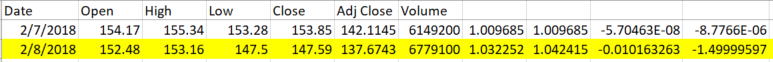

### The result

You result will have 6 dataframes, each of them have two columns, Date and Dividend. The dataframe should only have the rows that represent the divident day and amount.

### Submit (deadline midnight Oct 11, 2019)

Submit your jupyter notebook HTML file with all intermediate results and the final dataframe. 

## Midterm project: Equity Portfolio Management

### Data Preparation

Download the historial daily data of the entire 2018 for the 10 stocks 

```python
universe = ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN', 'FB', 'NFLX', 'TSLA', 'ORCL', 'SAP']
```

For example, to download IBM data, use the following link to go to yahoo finance page. Find the "Download Data" link to download the csv file to you local disk.
https://finance.yahoo.com/quote/IBM/history?period1=1514782800&period2=1546232400&interval=1d&filter=history&frequency=1d

Replace "IBM" with other stock symbol in the above URL, you will be able to download data for other 9 stocks.

You should have 10 csv files on your disk now. IBM.csv, MSFT.csv, etc. We call the 10 stocks "universe" which is the entire stock market you can trade.


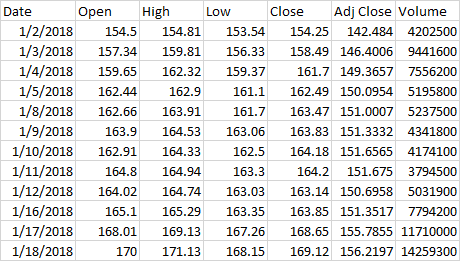


### Retrieve the "Close" and "Adj Close" values for each stock

You will create a dataframe where there are 20 columns for the 10 stocks, each row is the "Close" and "Adj Close" prices for the 10 stocks on each day, in the order of the business days in 2018. Assume all buy/sell on the "Close" prices and there is no transaction cost.

### You start to manage 5 million dollars fund on Jan 02, 2018

You have a strategy to manage the fund.

1. On Jan 02 2018, you split the \$5m into 5 \$1m, and use them to buy 5 stocks from the 10 stocks. For example, IBM close price was \$154.25. With \$1m, you can buy max 6482 shares with cost \$999848.5 with \$151.5‬ cash left. You decided to spend \$1m on each of ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN'] respectively and keep the rest cash into a zero-interest cash account. On Jan 02 2018, your mark to market value (MTM) is \$5m if combining all stocks value and cash. Your holdings of stocks and cach account is your portfolio.

\begin{equation*}
\ MTM^t =  cash^t + \sum_{k=1}^5 Shares_k^t \times ClosePrice_k^t \
\end{equation*}


2. Your trading strategy is "5 days rebalancing of buying low". Here is how it works. You keep your portfolio unchanged until 5 days later on Jan 09 2018. Now you want to re-check the market and adjust your portfolio. You will compute the "Adj Close" price changes from Jan 02 to Jan 09, and find the 5 stocks whose "Adj Close" prices dropped the most in terms of percentage. You sell all current holdings on Jan 09 "Close" prices to convert your portfolio to all cash. Then immediately split your cash, including your cash account, to 5 equal parts to buy the 5 stocks that dropped the most from Jan 02 to Jan 09 on 'Adj Close' prices. You always buy the max shares of stock on the "Close" price and keep the rest cash in cash account. Now the portfolio should be different from 5 days ago. This operation is called "rebalancing".

    Keep in mind, the MTM will change every day, even when your portfolio holdings don't change, because the stock prices change.


3. Corporations generally issue stock dividends on some days. The total dividend you get on such a day is the stock dividend  times your shares if you have shares of this stock on the dividend day. If you buy shares on the dividend day, these bought shares are not qualified to get dividend. If you sell shares on the dividend day, the sold shares are qualified to get dividend. For example, on 2/8/2018, IBM issued \$1.5 dividend per share. In your cash account, you will automatically get

\begin{equation*}
\$1.5 \times \left(your\ IBM\ shares\ on\ 2/8/2018\right)
\end{equation*} 



4. 5 business days later on Jan 17 (Jan 15 was a holiday), you re-check the market and adjust your portfolio again. You will have a new portfolio on Jan 17.


5. If you run this strategy every 5 days all the way to Dec 31 2018, you will have a daily MTM. You expect the MTM on Dec 31 2018 should be higher than \$5m because you always buy the stocks that dropped the most, i.e., you always buy low.


6. Another strategy is "5 days rebalancing of buying high". You always buy the 5 stocks whose "Adj Close" prices surge the most in terms of percentage because you believe the trend will continue. Run the new strategy and see how the MTM will change.


7. You will create a "high tech index" which is simply the daily average of the 10 stocks "Close" prices. Compare your MTM series with the "high tech index" and plot their curves. To plot the two curves together, you may want to convert the series to daily percentage change with regard to Jan 02 2018.


8. Download the USD/JPY 2018 historical data at https://www.myfxbook.com/en/forex-market/currencies/USDJPY-historical-data then use the "Close" column as the rate to convert your MTM series from USD to JPY. Plot the two MTM curves. You will need to convert to daily percentage change too.


9. The above two strategies both rebalance every 5 days. Try to change the days interval and find the optimal days interval that maximizes the MTM on 12/31/2018. 

### Submit(deadline midnight Oct 25, 2019)

Submit your jupyter notebook HTML file with all intermediate results and the final dataframe. Plot the curves.

